In [1]:
#Import Qiskit and Qiskit.Visualization
import qiskit
from qiskit import QuantumCircuit, assemble, Aer,execute
from qiskit.visualization import plot_bloch_multivector
from math import sqrt, pi
#Create List for Superposition Pixel Generator
from itertools import islice
#Graph Superposition Pixel
import turtle

In [2]:
#Set Current Qiskit Backend to QASM Simulator 
#Switch if using IBM Quantum Computers
sim=Aer.get_backend('qasm_simulator')

In [3]:
#Intializes Quantum Circuit with 1 Qubit and 1 Classical Bit
qc=QuantumCircuit(1,1)

#Amount of times simulation is run
sim_run=1024

In [4]:
#Specifies P(|1>) (Probability of |1>)
#P(|0>)=(1-P(|1>))
Prob_Value=int(input("Specify Required Distribution Percentage of |1>(Enter from 0 to 100)"))

In [5]:
#Calculates rotation required by Y axis(utilizing a Quintic Polynomial equation) in order to generate required distribution of |0> and |1>
qc.ry(((Prob_Value/(((-5*(10**-8))*(Prob_Value**5)) + ((9*(10**-6))*(Prob_Value**4)) - (0.0004*(Prob_Value**3)) - (0.017*(Prob_Value**2)) + (2.5868*(Prob_Value)) + (25.009)))*pi),0)

In [6]:
#Creates barrier between gates and measurements for qc.draw() and optimization level
qc.barrier()

In [7]:
#Run code to check Bloch spheres of Qubits in superposition(|+> basis)
#qc.save_statevector()
#qobj=assemble(qc)
#result=sim.run(qobj).result().get_statevector()
#plot_bloch_multivector(result)

In [8]:
#Collapses superposition of every Qubit and assigns value to corrosponding Classical bit
qc.measure(0,0)

In [9]:
#Run code to check Bloch spheres of Qubits in superposition(|+>  or |-> basis)
#qc.save_statevector()
#qobj=assemble(qc)
#result=sim.run(qobj).result().get_statevector()
#plot_bloch_multivector(result)

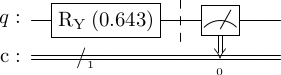

In [10]:
#Draws Quantum Circuit
qc.draw(output="latex")

In [11]:
#memory=True to access indivual simulation qubit measurement values
job=execute(qc,sim,shots=sim_run,memory=True)
result=job.result()
counts=result.get_counts()
memory=result.get_memory()

#print(memory)
#print(len(memory))

In [12]:
#creates lists for iterations
list_length=[]
for i in range (0,32):
    list_length.append(32)

#print(list_length)
#print(len(list_length))

In [13]:
#Create List for Superposition Pixel Generator
Input = iter(memory)
Quantum_Pixels = [list(islice(Input, x))
          for x in list_length]

#print(Quantum_Pixels)

In [14]:
Zero=str(input("Enter Hexadecimal code or Specified Value of 0:"))
One=str(input("Enter Hexadecimal code or Specified Value of 1:"))

In [ ]:
#Start Draw and set Draw to immediate print
Draw = turtle.Turtle()
wn=turtle.Screen()
wn.tracer(0)
square_int = 30	

In [ ]:
#Set Draw to top left corner of specified Print_Vertical and Print_Horizontal
Draw.penup()
Draw.forward(-480)
Draw.setheading(90)
Draw.forward(380)
Draw.setheading(0)

In [ ]:
for x in range (0,len(Quantum_Pixels)):
    for i in range (0,len(Quantum_Pixels[x])):
        if Quantum_Pixels[x][i]=="1":

            Draw.color(One)
            Draw.begin_fill()
            Draw.forward(square_int)

            Draw.left(90)
            Draw.forward(square_int)

            Draw.left(90)
            Draw.forward(square_int)

            Draw.left(90)
            Draw.forward(square_int)

            Draw.end_fill()
            Draw.setheading(0)
        else:
            Draw.color(Zero)
            Draw.begin_fill()

            Draw.forward(square_int)
            
            Draw.left(90)
            Draw.forward(square_int)

            Draw.left(90)
            Draw.forward(square_int)

            Draw.left(90)
            Draw.forward(square_int)

            Draw.end_fill()
            Draw.setheading(0)

        Draw.penup()
        Draw.forward(square_int)
        Draw.pendown()
        	
    Draw.setheading(270) 
    Draw.penup()
    Draw.forward(square_int)
    Draw.setheading(180) 
    Draw.forward(square_int*len(Quantum_Pixels[x]))
    Draw.setheading(0)
    Draw.pendown()
	
Draw.getscreen().update()	
turtle.done()